In [4]:
from PIL import Image

from astropy.io import fits

import matplotlib 



def get_center(img_with_pth):
    im = Image.open(img_with_pth).convert('RGB')

    x, y = im.size
    
    coords = []

    for y_indx in range(y):
        for x_indx in range(x):
   
            red, green, blue = im.getpixel((x_indx, y_indx))


            if red != 0 and green != 0 and blue != 0 and red > 30 and green > 30 and blue > 30:
                coords.append((x_indx, y_indx))

    max_x, max_y = coords[0]
    min_x, min_y = coords[0]

    for cord in coords:
        temp_x, temp_y = cord

        if temp_x > max_x:
            max_x = temp_x

        if temp_y > max_y:
            max_y = temp_y

        if temp_x < min_x:
            min_x = temp_x

        if temp_y < min_y:
            min_y = temp_x
            
    center_x = (float(max_x)+min_x)/2

    center_y = (float(max_y)+min_y)/2
    
    return (center_x, center_y)

In [5]:
def max_min_xy(img_with_pth):
    im = Image.open(img_with_pth).convert('RGB')

    x, y = im.size
    
    coords = []

    for y_indx in range(y):
        for x_indx in range(x):
   
            red, green, blue = im.getpixel((x_indx, y_indx))


            if red != 0 and green != 0 and blue != 0 and red > 30 and green > 30 and blue > 30:
                coords.append((x_indx, y_indx))

    max_x, max_y = coords[0]
    min_x, min_y = coords[0]

    for cord in coords:
        temp_x, temp_y = cord

        if temp_x > max_x:
            max_x = temp_x

        if temp_y > max_y:
            max_y = temp_y

        if temp_x < min_x:
            min_x = temp_x

        if temp_y < min_y:
            min_y = temp_x
            
#     center_x = (float(max_x)+min_x)/2

#     center_y = (float(max_y)+min_y)/2
    
    return (min_x, min_y, max_x, max_y)

In [28]:
def fits_cropper(base_path_to_config_file, config_file_name, temp_img_file_dir, cropped_img_file_dir):
    config_file = fits.open(base_path_to_config_file+config_file_name)
    
    image_data = config_file[0].data
    config_file.close()
    image_data = fits.getdata(image_data)
    matplotlib.image.imsave(temp_img_file_dir+'tmp.png', image_data, cmap='gray')

In [29]:
fits_cropper('/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/img/', 'config-i-0.fits', './test/', './test')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [6]:
base_path = '/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/img/'
cfile_name = 'config-i-0.fits'
cfile_w_path = base_path+cfile_name
path_to_destination = './test/' 
    
# t = crop_config(cfile_w_path, path_to_destination, disp_crop=True)

In [9]:
path_to_destination = path_to_destination + cfile_name[:-5]+'.png'
config_file = fits.open(cfile_w_path)
image_data = config_file[0].data
config_file.close()
image_data = fits.getdata(image_data)
matplotlib.image.imsave(path_to_destination, image_data, cmap='gray')

In [11]:
image_data = fits.getdata('/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/img/config-i-0.fits')


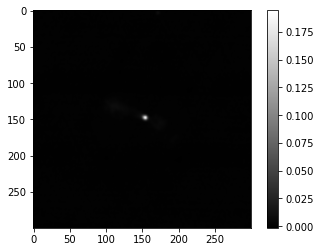

In [13]:
import matplotlib.pyplot as plt

plt.imshow(image_data, cmap='gray')
plt.colorbar()

In [14]:
import matplotlib 

matplotlib.image.imsave('name.png', image_data, cmap='gray')

In [15]:
t_im = Image.open("/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/"+'name.png')

In [17]:
x_cnt, y_cnt = get_center('/home/scarlet/Projects/DataScience/ImageProcessing/Crop4Research/test/' + 'config-i-0.png')

In [21]:
cropped = t_im.crop((x_cnt-75, y_cnt-75, x_cnt+75, y_cnt+75))

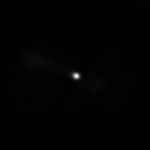

In [22]:
display(cropped)

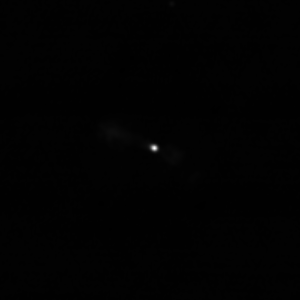

In [20]:
display(t_im)     # NN

In [24]:
cropped.save('test/tea2.png')